# Sklearn Intro

In [1]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Data exploration 

In [2]:
data = pd.read_csv("./data/ML_Houses_dataset.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
livecode_data = data[['GrLivArea','SalePrice']]

livecode_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


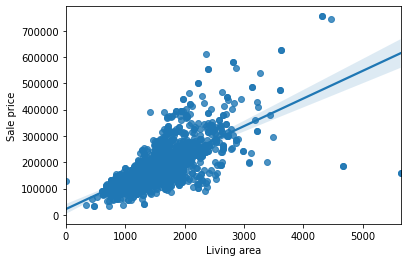

In [38]:
# Plot Living area vs Sale price
sns.regplot(x=data['GrLivArea'], y=data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

## Linear Models 

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

LinearRegression()

In [7]:
# intercept
model.intercept_

22104.12101002081

In [8]:
# slope
model.coef_

array([105.00927564])

In [9]:
# score
model.score(X,y)

0.48960426399689116

In [10]:
# predict
model.predict([[1000]])

array([127113.39664561])

In [11]:
# Manual prediction
model.coef_ * 1000 + model.intercept_

array([127113.39664561])

## R2 

In [110]:
# Instanciate the model
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
# setting y as DF for example
y_demo = data[['SalePrice']].copy()

# Train the model on the data
model.fit(X, y_demo.SalePrice);

In [111]:
# adding the series mean as a column
y_demo['mean'] = y_demo['SalePrice'].mean()
# adding each rows prediction
y_demo['predict'] = model.predict(X)
# checking each rows variance if we just predicted the mean
y_demo['variance_to_mean_sq'] = (y_demo['SalePrice'] - y_demo['mean'])**2
# checking it's variance to the model prediction
y_demo['variance_to_predict_sq'] = (y_demo['SalePrice'] - y_demo['predict'])**2
y_demo.head()

,SalePrice,mean,predict,variance_to_mean_sq,variance_to_predict_sq
0,208500,182289.685227,201669.982347,6.869806e+08,4.664914e+07
1,181500,182289.685227,154625.826862,6.236028e+05,7.222212e+08
2,223500,182289.685227,209650.687295,1.698290e+09,1.918035e+08
3,140000,182289.685227,202405.047276,1.788417e+09,3.894390e+09
4,250000,182289.685227,252914.508857,4.584687e+09,8.494362e+06


In [112]:
# what's my decrease in variance?
1 - y_demo.variance_to_predict_sq.sum() / y_demo.variance_to_mean_sq.sum()

0.48960426399689116

## Generalization  

###  Holdout

In [12]:
from sklearn.model_selection import train_test_split
# unpackand re-define
# split the data into train and test
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

# Ready Xs and ys
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

In [29]:
# Unpack all at once
# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
X_train.head()

,GrLivArea
1275,1920
391,1961
652,1716
320,2596
253,1302


In [30]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

0.5217193832101675

### Cross Validate

In [37]:
from sklearn.model_selection import cross_validate

# Instanciate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']
# Mean of scores
cv_results['test_score'].mean()


0.4863112208425962

###  Perfect Combination

In [45]:
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test set for final validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# instantiate your model
model = LinearRegression()

In [48]:
# 5-Fold Cross validate model on training set
cv_results = cross_validate(model, X_train, y_train, cv=5)

# Check your mean of scores
cv_results['test_score'].mean()

0.44465491962192427

In [49]:
# If score acceptale, finally fit your model on the full train set
model.fit(X_train, y_train)
# score your model on original holdout
model.score(X_test, y_test)

0.5217193832101675

## Learning Curves 

In [44]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores

array([[0.51071405, 0.49543383, 0.49543383, 0.49543383, 0.49543383],
       [0.59021136, 0.51944749, 0.51944749, 0.51944749, 0.51944749],
       [0.59537432, 0.55488807, 0.55488807, 0.55488807, 0.55488807],
       [0.5766314 , 0.51549801, 0.51549801, 0.51549801, 0.51549801],
       [0.51385625, 0.56050713, 0.56050713, 0.56050713, 0.56050713],
       [0.54769543, 0.56495786, 0.56630712, 0.56630712, 0.56630712],
       [0.51700005, 0.52848837, 0.54064102, 0.54379074, 0.54379074],
       [0.48457224, 0.491672  , 0.50236489, 0.53795744, 0.53795744],
       [0.48361962, 0.48957915, 0.49914166, 0.53303556, 0.53427557]])

(0.3, 0.8)

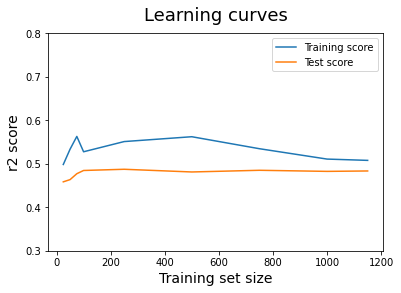

In [42]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.3, 0.8)